# Partial Autocorrelations

### In this notebook, we plot the partial autocorrelations of the time series in oour dataset.

### Import packages

In [1]:
%matplotlib inline

import os
import pandas as pd, numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot

pyplot.rcParams["figure.figsize"] = (20, 10)

### Global variables

In [2]:
DATA = "../data"

In [3]:
def create_frame_forecasting_frame(dataframe, col, max_timeshift, rolling_direction):
    return make_forecasting_frame(
        dataframe[col],
        kind=col,
        max_timeshift=max_timeshift,
        rolling_direction=rolling_direction,
    )


def create_and_save_dataset(forecasting_frame_tuple, path, horizon, split):
    X, y = forecasting_frame_tuple
    X = X.reset_index(drop=True)
    y = pd.DataFrame(y).reset_index()
    y["value"] = y["value"].shift(1 - horizon)
    y = y.rename(columns={"index": "id"})

    df = pd.merge(X, y, how="inner", on=["id"])
    df = df.rename(columns={"value_x": "X", "value_y": "y", "kind": "asset_code"})
    df = df[["id", "time", "X", "y", "asset_code"]]
    df = df[~df["y"].isnull()].reset_index(drop=True)

    dataset_name = np.unique(df["asset_code"])[0]

    if horizon > 1:
        horizon = str(horizon) + "-days-horizon-"
    else:
        horizon = str(horizon) + "-day-horizon-"

    filename = os.path.join(
        path, "rolled-dataset-" + horizon + "-" + dataset_name + "-" + split + ".pkl"
    )

    with open(filename, "wb") as fOut:
        pickle.dump(
            {
                "X": X.rename(columns={"value": "price"}),
                "y": y.rename(columns={"value": "target"}),
            },
            fOut,
            protocol=pickle.HIGHEST_PROTOCOL,
        )

    # df.to_csv(os.path.join(path, 'rolled-dataset-' + horizon + '-' + dataset_name + '-' + split + '.csv'), index=False)

# STEP 0: Load the data

In [4]:
df = pd.read_csv(os.path.join(DATA, "assets-prices-no-missing-values.csv"), index_col=0)

print(f"Size of the data: {df.shape}\n\n")
df.head()

Size of the data: (1491, 8)




,AC.PA,BNP.PA,CAP.PA,ENGI.PA,G.MI,RACE.MI,SAN.PA,TIT.MI
Date,,,,,,,,
2018-01-02,43.480000,62.090000,99.000000,14.230000,15.020000,87.300003,71.760002,0.725500
2018-01-03,43.310001,62.639999,101.000000,14.290000,14.890000,88.800003,72.070000,0.725000
2018-01-04,43.599998,63.770000,101.349998,14.515000,15.000000,92.500000,73.000000,0.734000
2018-01-05,43.770000,63.889999,102.500000,14.595000,15.200000,93.349998,74.360001,0.738500
2018-01-06,43.973334,64.093333,102.466667,14.626667,15.203333,93.783333,74.356667,0.743167


# STEP 1: Plot the Partial Autocorrelations

In [5]:
# According to Pearson's critical correlations table
# degree of freedom = len(df) - 2 ~ 1000
# confidence = 0.05
# critical_correlation = 0.06
critical_correlation = 0.1

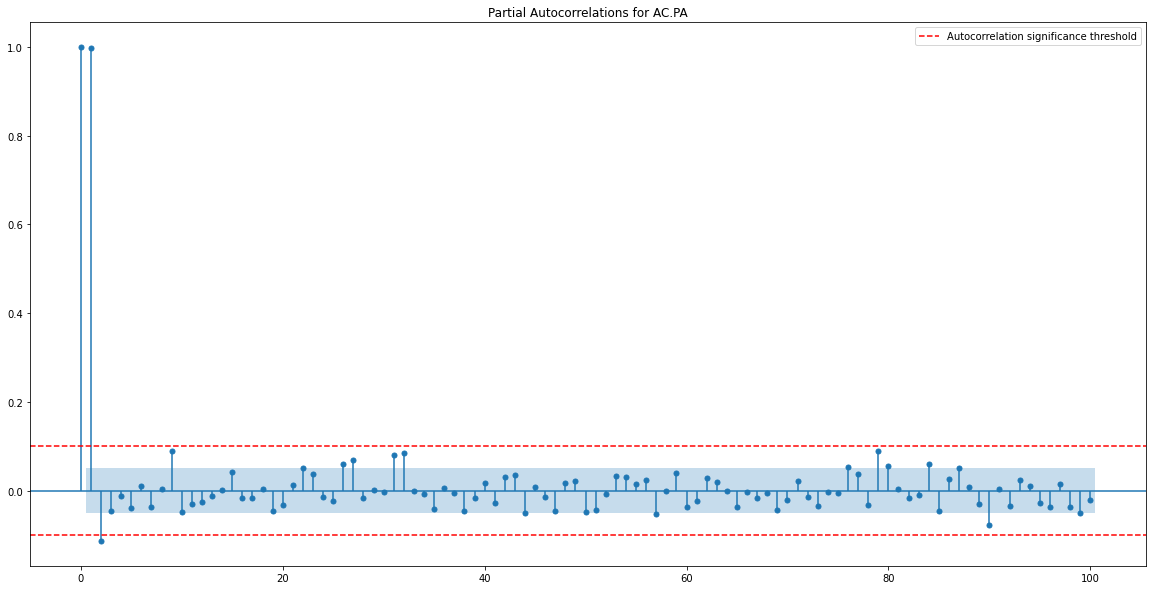

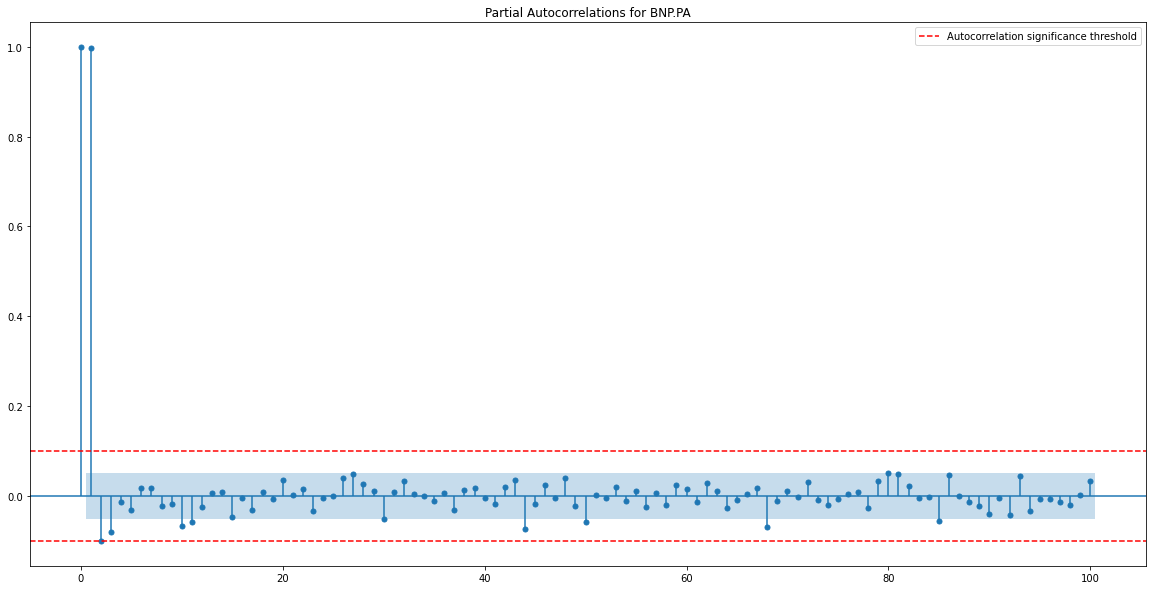

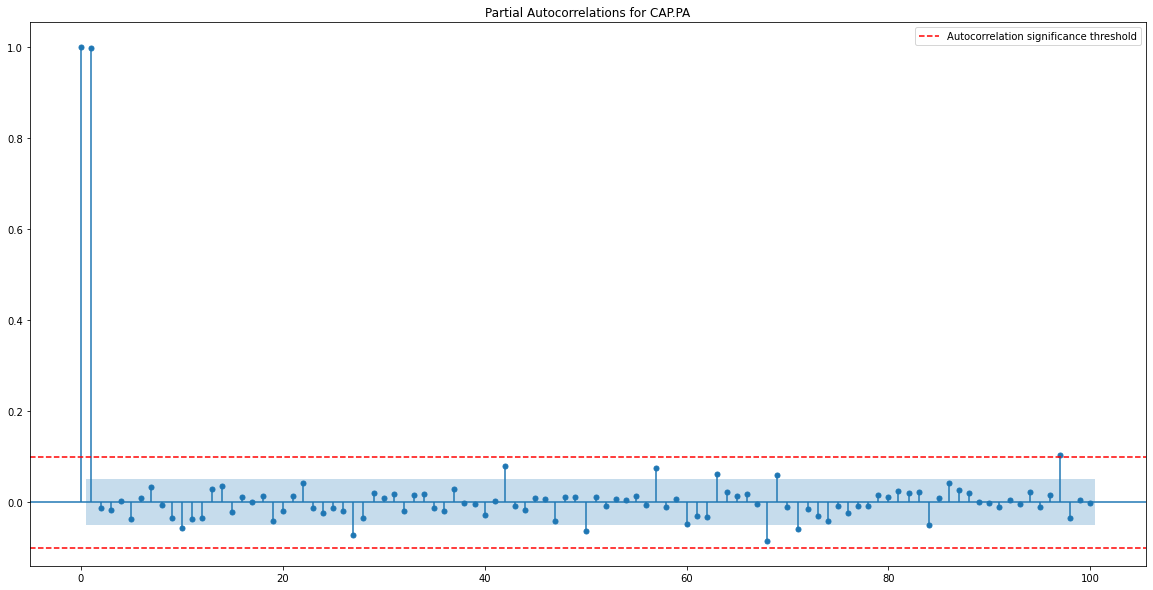

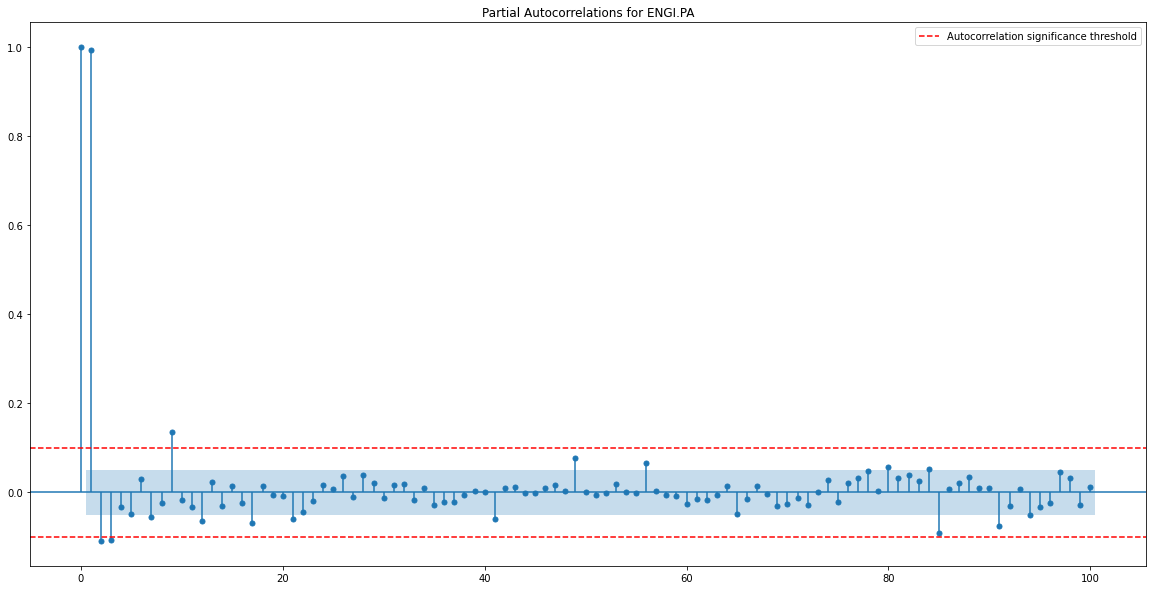

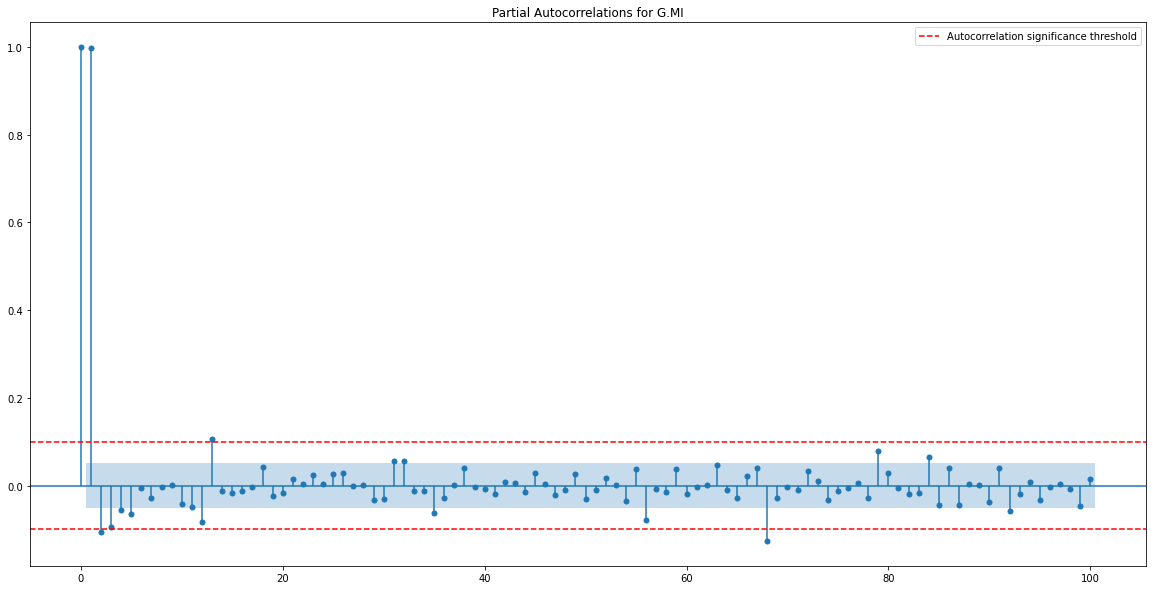

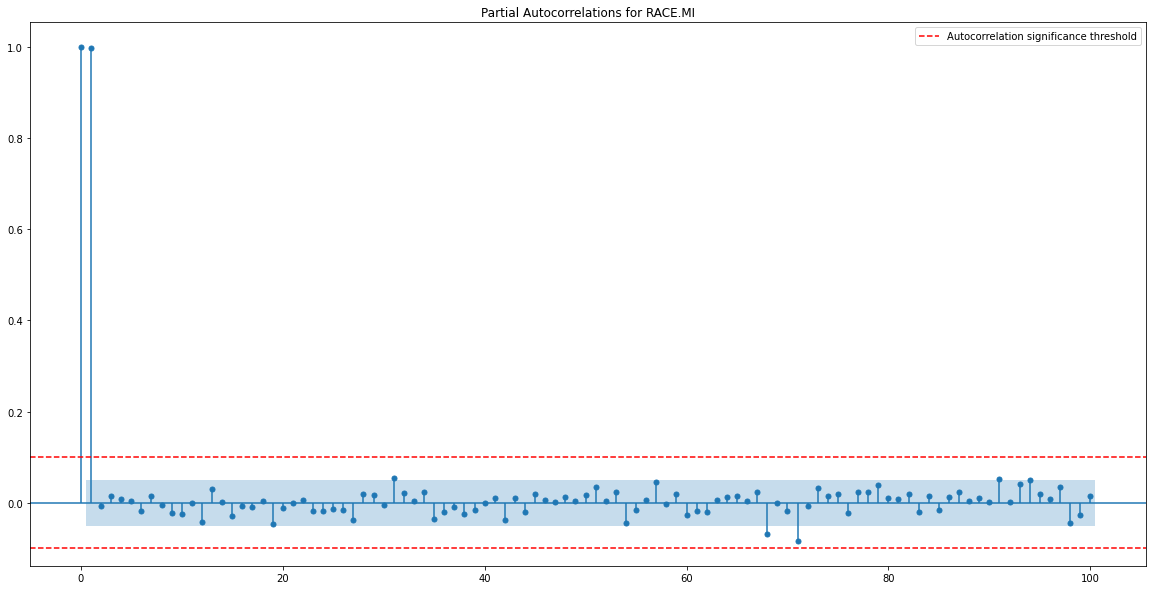

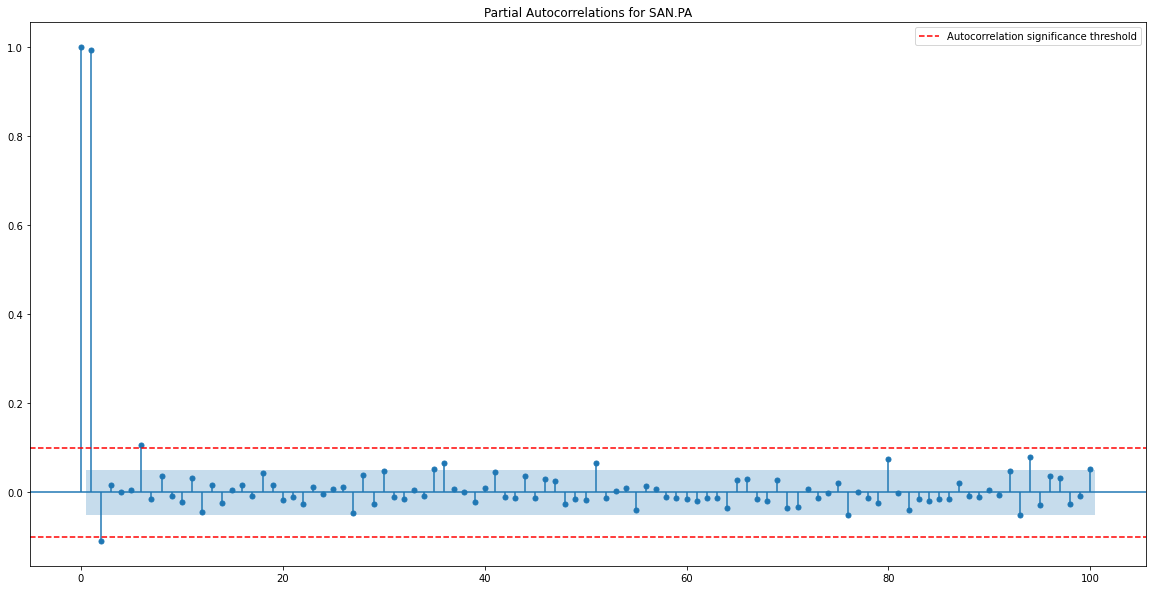

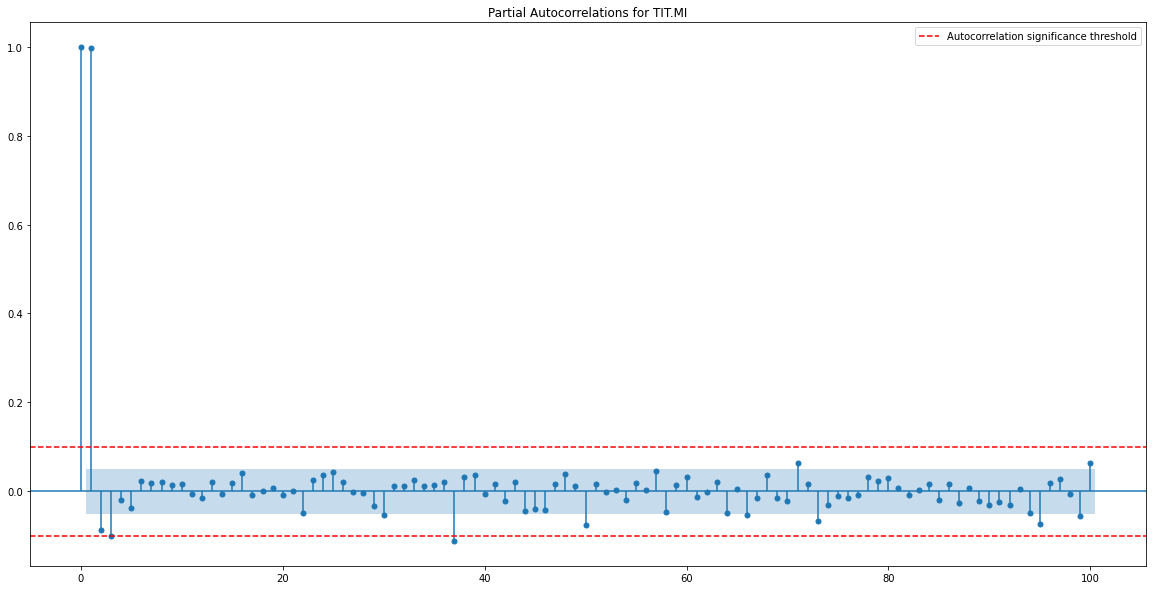

CPU times: user 16.3 s, sys: 28.1 s, total: 44.3 s
Wall time: 3.46 s


In [6]:
%%time
for c in df.columns:
    plot_pacf(df[c], lags=100, method="yw")
    pyplot.gca().set_title(f"Partial Autocorrelations for {c}")
    pyplot.axhline(
        y=critical_correlation,
        color="r",
        linestyle="--",
        label="Autocorrelation significance threshold",
    )
    pyplot.axhline(y=-critical_correlation, color="r", linestyle="--")
    pyplot.legend(loc="upper right")
    pyplot.show()